In [340]:
import numpy as np
import matplotlib.pyplot as plt

In [341]:
SIZE = 10000
STD = 3

In [342]:
def error_model(size, mean, std):
    return np.random.normal(mean, std, size)

In [343]:
def monte_carlo(size, a, b):
    return np.random.rand(size) * (b - a) + a

In [344]:
def change_model(data):
    return data ** 2 / 2

In [345]:
def experimental_data(data, error):
    return np.add(data, error)

In [346]:
def generate_data(size):
    error = error_model(size, mean=0, std=STD)
    rand_data = monte_carlo(size, -10, 10)
    rand_data = np.sort(rand_data)
    trend_data = change_model(rand_data)
    experiment_data = experimental_data(trend_data, error)
    return rand_data, trend_data, experiment_data

In [347]:
def MNK(x, y):
    yin = np.reshape(y, (-1, 1))
    F = np.ones((len(x), 3))
    F[::, 1] = x
    F[::, 2] = x ** 2
    FT = F.T
    FT_F = FT.dot(F)
    FT_F_inv = np.linalg.inv(FT_F)
    FT_F_inv_FT = FT_F_inv.dot(FT)
    C = FT_F_inv_FT.dot(yin)
    yout = F.dot(C)
    return yout

In [348]:
def remove_outliers(x, y):
    data = np.array(list(zip(x, y)))
    window_size = 200
    
    i = 0
    while i < len(data) - window_size:
        mnk = MNK(data[i:i + window_size, 0], data[i:i + window_size, 1])
        std = np.std(data[i:i + window_size, 1])

        if abs(data[i + window_size - 1, 1] - mnk[-1]) > 3 * std:
            data = np.delete(data, i + window_size - 1, axis=0)
        else:
            i += 1
            
    return data[:, 0], data[:, 1]

In [349]:
def stats_info(data):
    print('Mean: ', np.mean(data))
    print('Median: ', np.median(data))
    print('Variance: ', np.var(data))
    print('Std: ', np.std(data), '\n')

In [350]:
rand_data, trend_data, experiment_data = generate_data(SIZE)
yout = MNK(rand_data, experiment_data)
rand_data_2, experiment_data_2 = remove_outliers(rand_data, experiment_data)
yout_2 = MNK(rand_data_2, experiment_data_2)

(10000,) (10000,) (10000,)
(10000, 1)
(9978,) (9978,)


In [351]:
print('Random data:')
stats_info(rand_data)

Random data:
Mean:  -0.05289108984110735
Median:  -0.15654177421230653
Variance:  33.223100102456975
Std:  5.763948308447689 



In [352]:
print('Trend data stats with outliers:')
stats_info(trend_data)

Trend data stats with outliers:
Mean:  16.61294878492078
Median:  12.578035113025749
Variance:  221.1956024749441
Std:  14.872646115434339 



In [353]:
print('Experiment data stats with outliers:')
stats_info(experiment_data)

Experiment data stats with outliers:
Mean:  16.647129385280742
Median:  12.732999279860127
Variance:  228.77456958720038
Std:  15.125295685942817 



In [354]:
print('Random data after removing outliers stats:')
stats_info(rand_data_2)

Random data after removing outliers stats:
Mean:  -0.05094612489127046
Median:  -0.15545976277097928
Variance:  33.246208584989
Std:  5.765952530587552 



In [355]:
print('Experiment data after removing outliers stats:')
stats_info(experiment_data_2)

Experiment data after removing outliers stats:
Mean:  16.66739257849466
Median:  12.744078448285567
Variance:  228.7349781877339
Std:  15.123986848306034 



In [356]:
print('Smoothed data stats:')
stats_info(yout)

Smoothed data stats:
Mean:  16.647129385280753
Median:  12.625662728674701
Variance:  219.75892198660918
Std:  14.824268008458603 



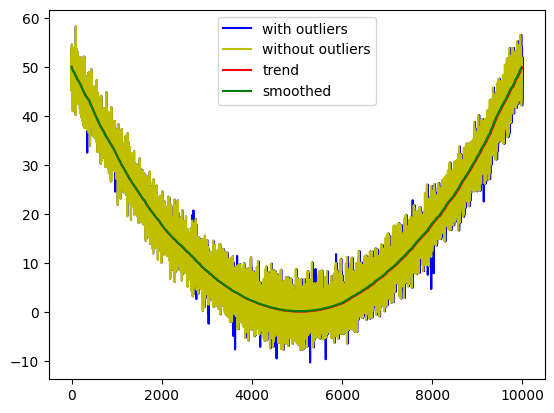

In [388]:
plt.plot(experiment_data, 'b', label='with outliers')
plt.plot(experiment_data_2, 'y', label='without outliers')
plt.plot(trend_data, 'r', label='trend')
plt.plot(yout_2, 'g', label='smoothed')
plt.legend()
plt.show()

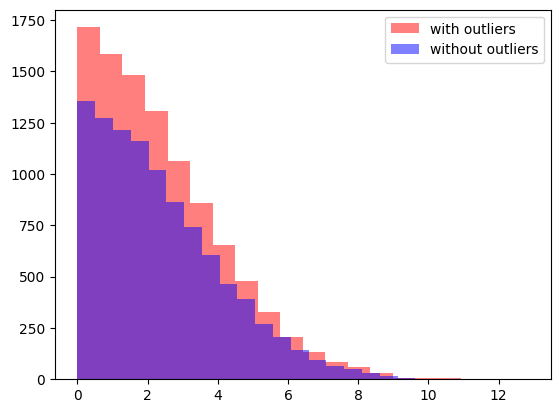

In [392]:
plt.hist(abs(experiment_data - trend_data), bins=20, facecolor='red', alpha=0.5, label='with outliers')
plt.hist(abs(experiment_data_2 - change_model(rand_data_2)), bins=20, facecolor='blue', alpha=0.5, label='without outliers')
plt.legend()
plt.show()